4
3024
4032
3


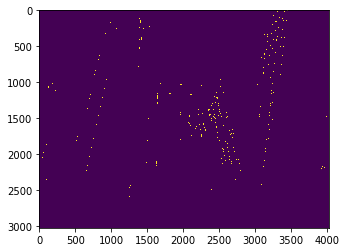

In [2]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('./dev_images/IMG_2254.jpg') #imreadの第2引数に0を指定するとグレースケールで読み込み

print(cv2.COLOR_BGR2RGB)
# plt.gray() #matplotlibでグレースケールを使用する場合はグレースケールで読み込むように指定
plt.imshow(img)
rows, cols, channel = img.shape
print(rows)
print(cols)
print(channel)
x0 = cols/4
x1 = (cols*3)/4
y0 = rows/4
y1 = (rows*3)/4

list_srcs = np.float32([[x0, y0],[x0, y1],[x1, y1],[x1, y0]])

x_margin = cols/10
y_margin = rows/10

list_dsts = np.float32([[x0+x_margin, y0+y_margin],list_srcs[1],list_srcs[2],[x1-x_margin, y0+y_margin]])

perspective_matrix = cv2.getPerspectiveTransform(list_srcs,list_dsts)
dst = cv2.warpPerspective(img, perspective_matrix, (cols, rows))
plt.imshow(dst)
plt.imshow(img)
edges = cv2.Canny(img,100,200)
# 画像を表示
plt.imshow(edges)